# PREDICTING BEST OFFER FOR CAR INSURANCE 



### (A CASE STUDY OF FUNUSUNU INSURANCE COMPANY) 



## PRESENTED BY: JOAQUIM OLAOLUWA EZEKIEL


### DSN PREBOOTCAMP 2021

## Business Objective

The objective of this analysis is to build the best machine learning model that can predict the best offer for car insurance for the company to sustain her reign.

In [74]:
# Loading the libraries and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Libraries for Preprocesing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

##Libraries for Model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#hper parameter modelin
from sklearn.model_selection import GridSearchCV

# to remove warnings
import warnings
warnings.filterwarnings('ignore') 

In [75]:
# read in dataset

train = pd.read_csv('train_insurance.csv')
test = pd.read_csv('test_insurance.csv')

## UNDERSTANDING THE DATA ( Descriptive Statistics)

In [76]:
# check the shape of the data
print(f'The shape of the train data is {train.shape}')
print(f'The shape of the test data is {test.shape}')

# Each row represents a customer, each column contains customer’s attributes described on the column data.
train.head()


The shape of the train data is (6393, 24)
The shape of the test data is (2741, 23)


,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3
2,Customer_4952,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,...,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent,0
3,Customer_1489,Female,0,Suburban,Single,Imo,8512.525936,Not_interested,Silver,HND,...,Sports Car,Medsize,5,94,0,8,Personal,P_L2,Branch,1
4,Customer_812,Male,140494,Rural,Single,Imo,3280.531880,Not_interested,Silver,PHD,...,Four-Door Car,Medsize,13,19,2,1,Personal,P_L2,Call Center,3


In [77]:
#Each row represents a customer, each column contains customer’s attributes described on the column test data.

test.head()

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Total Claim Amount,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel
0,Customer_708,Male,149170,Rural,Married,Lagos,4224.631209,Not_interested,Bronze,O_Level,...,218.598065,SUV,Medsize,1,49,0,1,Personal,P_L3,Agent
1,Customer_47,Female,46436,Suburban,Single,Abuja,5516.344018,Not_interested,Bronze,O_Level,...,447.793440,Two-Door Car,Medsize,7,10,0,4,Personal,P_L2,Agent
2,Customer_3995,Female,189806,Suburban,Married,Abuja,3810.122147,Interested,Silver,HND,...,451.200000,Two-Door Car,Small,3,38,0,1,Personal,P_L3,Agent
3,Customer_1513,Female,154306,Urban,Married,Lagos,7916.823110,Not_interested,Silver,HND,...,355.641958,Four-Door Car,Medsize,3,27,2,5,Personal,P_L3,Branch
4,Customer_3686,Female,47538,Suburban,Divorced,Kano,7933.722181,Not_interested,Bronze,O_Level,...,470.097411,Four-Door Car,Medsize,18,14,0,2,Personal,P_L2,Branch


In [78]:
# check the info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    6393 non-null   object 
 1   Sex                            6393 non-null   object 
 2   Earnings                       6393 non-null   int64  
 3   Region_Code                    6393 non-null   object 
 4   Marital Status                 6393 non-null   object 
 5   State_of_Origin                6393 non-null   object 
 6   Customer_Worth                 6393 non-null   float64
 7   Customer_Reply                 6393 non-null   object 
 8   Plan                           6393 non-null   object 
 9   Certification                  6393 non-null   object 
 10  Effective To Date              6393 non-null   object 
 11  Status_of_Employment           6393 non-null   object 
 12  Premium_Auto_per_Month         6393 non-null   i

In [79]:
# check for missing values

print(f'The number of missing values  {train.isna().sum()}')
print('\n')
print(f'The percentage of missing values  {train.isna().mean() * 100}')

The number of missing values  Customer_ID                      0
Sex                              0
Earnings                         0
Region_Code                      0
Marital Status                   0
State_of_Origin                  0
Customer_Worth                   0
Customer_Reply                   0
Plan                             0
Certification                    0
Effective To Date                0
Status_of_Employment             0
Premium_Auto_per_Month           0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Months Since Last Claim          0
Months Since Policy Inception    0
Counts_of_Open_Complaints        0
No_Of_POlicy                     0
kind_of_policy                   0
Active_Policy                    0
Sales Channel                    0
Best_Offer                       0
dtype: int64


The percentage of missing values  Customer_ID                      0.0
Sex                              0.0
Earning

In [80]:
# checking the parameters of the first 3 rows

train.head(3)

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3
2,Customer_4952,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,...,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent,0


In [81]:
# understanding the Region_code Values

train.Region_Code.value_counts()


Suburban    4046
Rural       1231
Urban       1116
Name: Region_Code, dtype: int64

In [82]:
# understanding the Marital status Values

train['Marital Status'].value_counts()

Married     3735
Single      1682
Divorced     976
Name: Marital Status, dtype: int64

In [83]:
# understanding the State of origin Values

train['State_of_Origin'].value_counts()

Lagos    2225
Abuja    1819
Imo      1158
Enugu     646
Kano      545
Name: State_of_Origin, dtype: int64

In [84]:
# understanding the Plan Values

train.Plan.value_counts()

Bronze    3895
Silver    1928
Gold       570
Name: Plan, dtype: int64

In [85]:
# understanding the Certificate Values

train.Certification.value_counts()

First_Degree     1896
HND              1880
O_Level          1864
Second_Degree     500
PHD               253
Name: Certification, dtype: int64

In [86]:
# understanding the Vechile class Values

train['Vehicle Class'].value_counts()

Four-Door Car    3221
Two-Door Car     1316
SUV              1264
Sports Car        336
Luxury SUV        128
Luxury Car        128
Name: Vehicle Class, dtype: int64

In [87]:
# understanding the vechile size Values

train['Vehicle Size'].value_counts()

Medsize    4501
Small      1235
Large       657
Name: Vehicle Size, dtype: int64

In [88]:
# understanding the kind_of_policy Values

train['kind_of_policy'].value_counts()

Personal     4774
Corporate    1347
Special       272
Name: kind_of_policy, dtype: int64

In [89]:
train['Best_Offer'].value_counts()

0    2640
1    2046
2     977
3     730
Name: Best_Offer, dtype: int64

In [90]:
# understanding the Active_policy Values

train['Active_Policy'].value_counts()

P_L3    2409
P_L2    1483
P_L1     882
C_L3     683
C_L2     418
C_L1     246
S_L2     116
S_L3     107
S_L1      49
Name: Active_Policy, dtype: int64

In [91]:
# understanding the Sales Channel Values

train['Sales Channel'].value_counts()

Agent          2437
Branch         1783
Call Center    1247
Web             926
Name: Sales Channel, dtype: int64

In [92]:
test1 = test

In [93]:
# modify the missing values

train.drop(['Region_Code', 'Effective To Date'], axis=1, inplace=True)
test.drop(['Region_Code', 'Effective To Date'], axis=1, inplace=True) # i would need my Customer Id to make my final prediction so i can drop it from my test data

In [94]:
train.head(2)

,Customer_ID,Sex,Earnings,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,Status_of_Employment,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Single,Kano,5017.009472,Interested,Silver,First_Degree,Fully_Employed,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Customer_4641,Female,53754,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,Fully_Employed,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    6393 non-null   object 
 1   Sex                            6393 non-null   object 
 2   Earnings                       6393 non-null   int64  
 3   Marital Status                 6393 non-null   object 
 4   State_of_Origin                6393 non-null   object 
 5   Customer_Worth                 6393 non-null   float64
 6   Customer_Reply                 6393 non-null   object 
 7   Plan                           6393 non-null   object 
 8   Certification                  6393 non-null   object 
 9   Status_of_Employment           6393 non-null   object 
 10  Premium_Auto_per_Month         6393 non-null   int64  
 11  Total Claim Amount             6393 non-null   float64
 12  Vehicle Class                  6393 non-null   o

In [96]:
# Now lets describe our dataset while transposing

train.describe().T

,count,mean,std,min,25%,50%,75%,max
Earnings,6393.0,75460.097294,60449.019210,0.000000,20674.000000,67934.000000,124652.000000,199962.000000
Customer_Worth,6393.0,7977.945276,6718.376651,1900.007675,4070.092649,5813.996703,8988.610653,83327.381190
Premium_Auto_per_Month,6393.0,186.728297,69.099601,122.000000,136.000000,166.000000,218.000000,594.000000
Total Claim Amount,6393.0,435.023938,292.522148,0.099007,273.250112,381.118731,547.200000,2893.239678
Months Since Last Claim,6393.0,15.100266,10.112762,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,6393.0,47.987956,27.853750,0.000000,24.000000,48.000000,71.000000,99.000000
Counts_of_Open_Complaints,6393.0,0.768340,1.845483,0.000000,0.000000,0.000000,0.000000,10.000000
No_Of_POlicy,6393.0,2.986235,2.399311,1.000000,1.000000,2.000000,4.000000,9.000000
Best_Offer,6393.0,0.968247,1.010780,0.000000,0.000000,1.000000,2.000000,3.000000


## SPLITTING INTO TRAIN AND TEST DATA

In [97]:
# preventing data leakage, so we will split our train and test here and use our train test for our exploratory Data Analysis.


train,test = train_test_split(train,test_size=0.2,random_state=1)

In [98]:
train.head(10)

,Customer_ID,Sex,Earnings,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,Status_of_Employment,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
4682,Customer_6877,Male,43084,Married,Lagos,20268.498770,Not_interested,Bronze,O_Level,Fully_Employed,...,Sports Car,Small,18,37,0,2,Special,S_L2,Branch,3
5193,Customer_4460,Female,58454,Married,Abuja,5899.555427,Not_interested,Bronze,O_Level,Fully_Employed,...,Two-Door Car,Medsize,0,83,0,7,Special,S_L3,Branch,0
5888,Customer_5541,Female,0,Married,Lagos,4789.472973,Not_interested,Bronze,HND,Not_employed,...,Four-Door Car,Medsize,17,84,0,3,Personal,P_L2,Agent,1
3473,Customer_1885,Female,0,Single,Lagos,6023.842473,Not_interested,Gold,O_Level,Not_employed,...,SUV,Medsize,11,46,0,1,Personal,P_L3,Agent,0
1519,Customer_5574,Female,119656,Married,Kano,8416.080425,Not_interested,Bronze,Second_Degree,Fully_Employed,...,SUV,Large,25,49,0,8,Personal,P_L1,Call Center,0
2667,Customer_2235,Male,0,Single,Lagos,6277.155361,Not_interested,Silver,O_Level,Not_employed,...,Four-Door Car,Small,15,55,0,3,Personal,P_L3,Branch,3
4536,Customer_7057,Male,48118,Married,Abuja,4432.572112,Not_interested,Bronze,O_Level,Fully_Employed,...,SUV,Medsize,31,17,0,1,Personal,P_L3,Web,3
3251,Customer_1529,Male,0,Married,Imo,5676.383424,Not_interested,Bronze,HND,Not_employed,...,Four-Door Car,Medsize,13,6,10,2,Personal,P_L3,Agent,0
5400,Customer_6230,Female,58196,Married,Lagos,9179.953095,Not_interested,Bronze,O_Level,Fully_Employed,...,SUV,Medsize,21,19,0,4,Personal,P_L1,Web,2
934,Customer_8835,Male,104348,Married,Lagos,14384.564630,Not_interested,Silver,HND,Fully_Employed,...,SUV,Medsize,22,25,0,2,Personal,P_L2,Call Center,0


In [99]:
#train shape

train.shape

(5114, 22)

In [100]:
#test Shape

test.shape

(1279, 22)

### UNIVARIATE EXPLORATION

In [101]:
# let's check the proportion of customers that has churned,

#Target variable

train['Best_Offer'].describe()

count    5114.000000
mean        0.972233
std         1.010028
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Best_Offer, dtype: float64

Text(0.5, 0, 'Best_Offer')

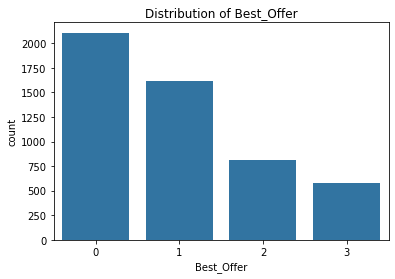

In [102]:
# let's plot the countplot for Churn Label category

base_color = sns.color_palette()[0]
sns.countplot(data = train, x = 'Best_Offer', color = base_color);
plt.title("Distribution of Best_Offer")
plt.xlabel('Best_Offer')

## NUMERICAL FEATURES RELATIONSHIPS

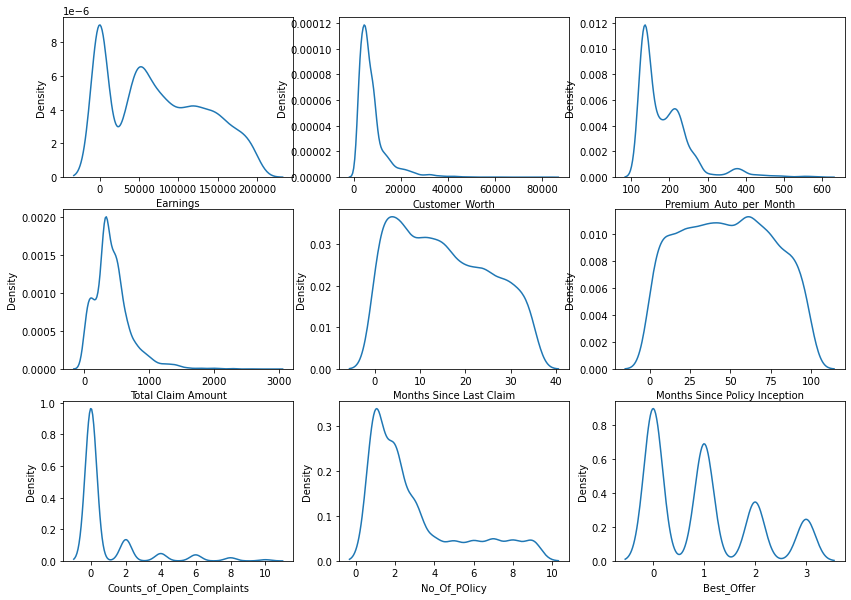

In [103]:
col = ['Earnings','Customer_Worth','Premium_Auto_per_Month','Total Claim Amount', 'Months Since Last Claim','Months Since Policy Inception',
       'Counts_of_Open_Complaints','No_Of_POlicy','Best_Offer'] #numerical features
fig = plt.figure(figsize=(14,10))
a = 3
b = 3
c = 1
for  i in col:
        plt.subplot(a,b,c)
        sns.kdeplot(x=train[i],data=train, palette ="CMRmap") #plots kde for numerical variable
        c = c + 1


In [104]:
#train columns

train.columns.values

array(['Customer_ID', 'Sex', 'Earnings', 'Marital Status',
       'State_of_Origin', 'Customer_Worth', 'Customer_Reply', 'Plan',
       'Certification', 'Status_of_Employment', 'Premium_Auto_per_Month',
       'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Counts_of_Open_Complaints', 'No_Of_POlicy', 'kind_of_policy',
       'Active_Policy', 'Sales Channel', 'Best_Offer'], dtype=object)

## CATEGORICAL VARIABLES RELATIONSHIP

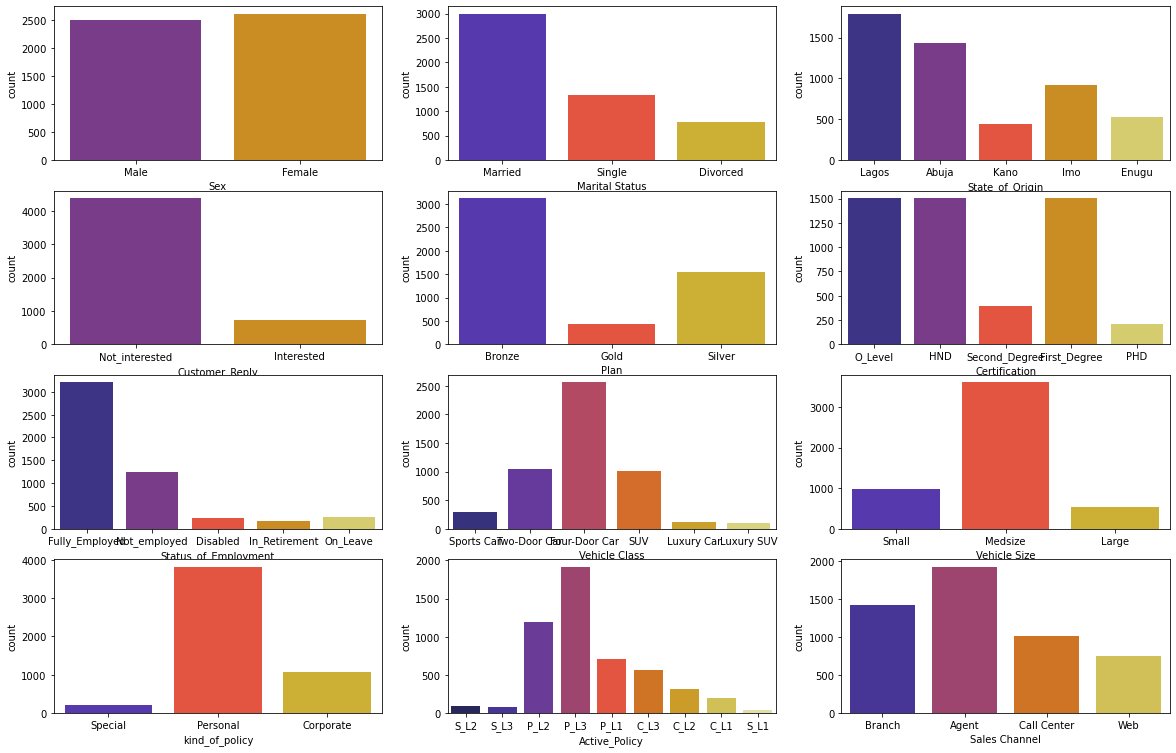

In [105]:
cat_col = ['Sex', 'Marital Status', 'State_of_Origin','Customer_Reply', 'Plan', 'Certification',
       'Status_of_Employment', 'Vehicle Class', 'Vehicle Size', 'kind_of_policy',
       'Active_Policy', 'Sales Channel']
fig = plt.figure(figsize=(20,13))
a = 4 #number of rows
b = 3 #number of columns
c = 1 #counter
for  i in cat_col:
        plt.subplot(a,b,c)
        sns.countplot(x= train[i], data=train, palette="CMRmap")
        c = c + 1

### From the visualisations above it can be inferred that;

    
* Sex: That male and female sex has a balanced distribution

* Marital Status: Most of the customers are Married 

* State of Origin: Most of the customers are from Lagos followed by Abuja  

* Customer Response: Most of the customers are not interested in giving response.

* Plan: Majority of the customers go for bronze plan

* Certification: Majority of the customer has OND,HND and BSC Qualification.

### MULTIVARIATE EXPLORATION

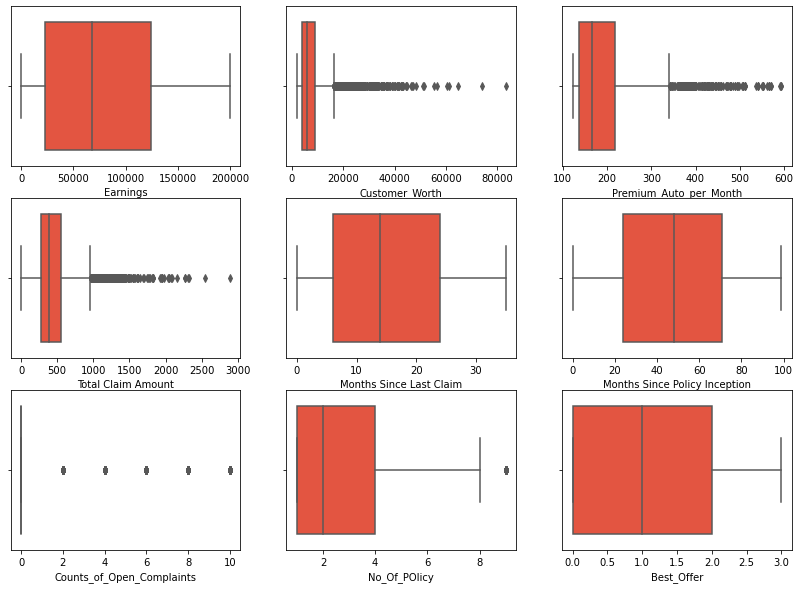

In [106]:
col1 = ['Earnings','Customer_Worth','Premium_Auto_per_Month','Total Claim Amount', 'Months Since Last Claim','Months Since Policy Inception',
       'Counts_of_Open_Complaints','No_Of_POlicy','Best_Offer'] #numerical features
fig = plt.figure(figsize=(14,10))
a = 3
b = 3
c = 1
for  i in col1:
        plt.subplot(a,b,c)
        sns.boxplot(x=train[i],data=train, hue='Best_Offer', palette ="CMRmap") #plots kde for numerical variable
        c = c + 1

* we could see above that Total Claim amount,Premium Auto Per month and Customer Worth has alot of outliers,this might signal some chances of multicollinearity between the parameters.

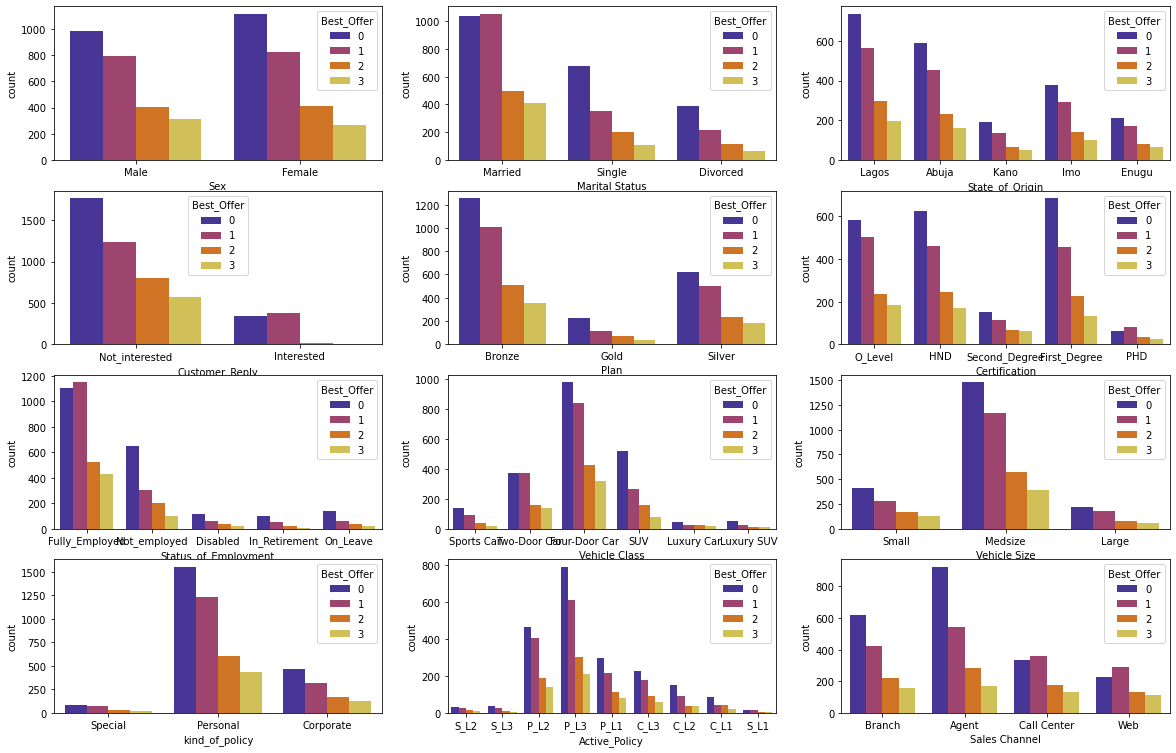

In [107]:
cat_col = ['Sex', 'Marital Status', 'State_of_Origin','Customer_Reply', 'Plan', 'Certification',
       'Status_of_Employment', 'Vehicle Class', 'Vehicle Size', 'kind_of_policy',
       'Active_Policy', 'Sales Channel']
fig = plt.figure(figsize=(20,13))
a = 4 #number of rows
b = 3 #number of columns
c = 1 #counter
for  i in cat_col:
        plt.subplot(a,b,c)
        sns.countplot(x= train[i], data=train, hue='Best_Offer', palette="CMRmap")
        c = c + 1

### MULTICOLINEARITY IN NUMERICAL VARIABLES 

With a multicolinearity threshold of 0.70,'Total claim amount' column and 'Premium auto per amount' has high multicollinearity but for the sake of our analysis, Total Claim Amount would be dropped as it display less relationship with the target variable. 

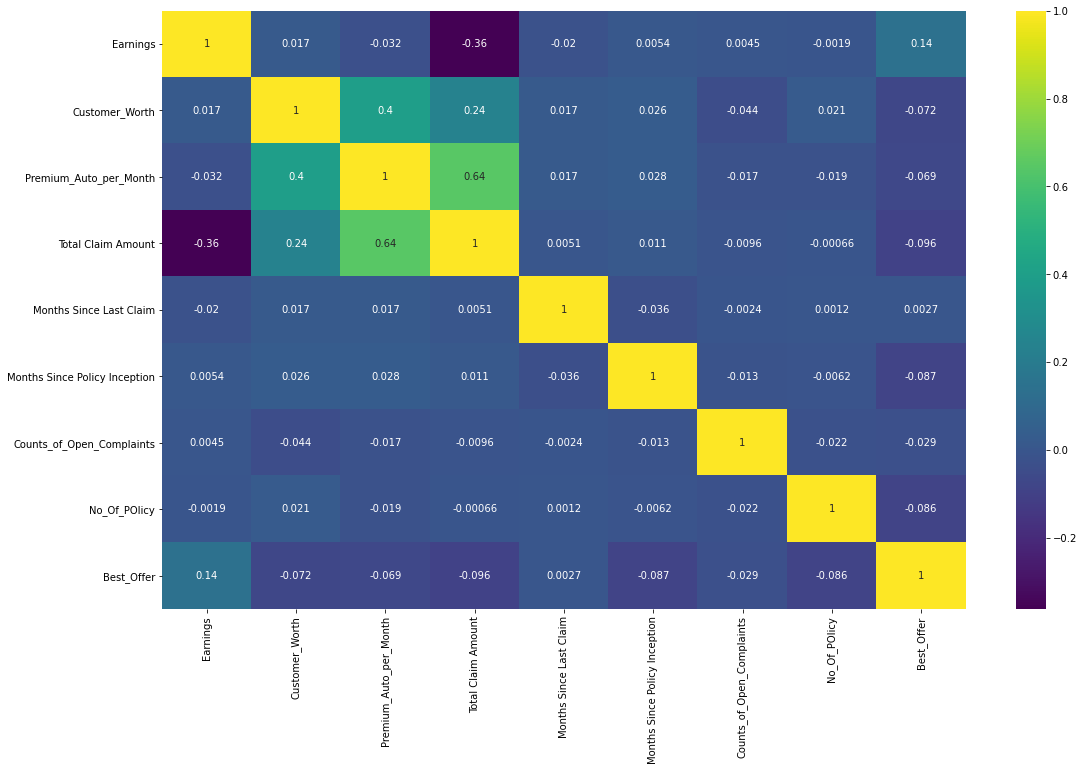

In [108]:
# heatmap showing correlation between the features

plt.figure(figsize=(18,11))

sns.heatmap(train.corr(),annot=True,cmap='viridis');

## PREPROCESSING AND ENCODING 

In [109]:
cols = ['Sex', 'Marital Status', 'State_of_Origin','Customer_Reply', 'Plan', 'Certification',
       'Status_of_Employment', 'Vehicle Class', 'Vehicle Size', 'kind_of_policy',
       'Active_Policy', 'Sales Channel']

trainenc = pd.get_dummies(train, columns=cols, drop_first=True)
testenc = pd.get_dummies(test, columns=cols, drop_first=True)

In [110]:
trainenc.shape

(5114, 48)

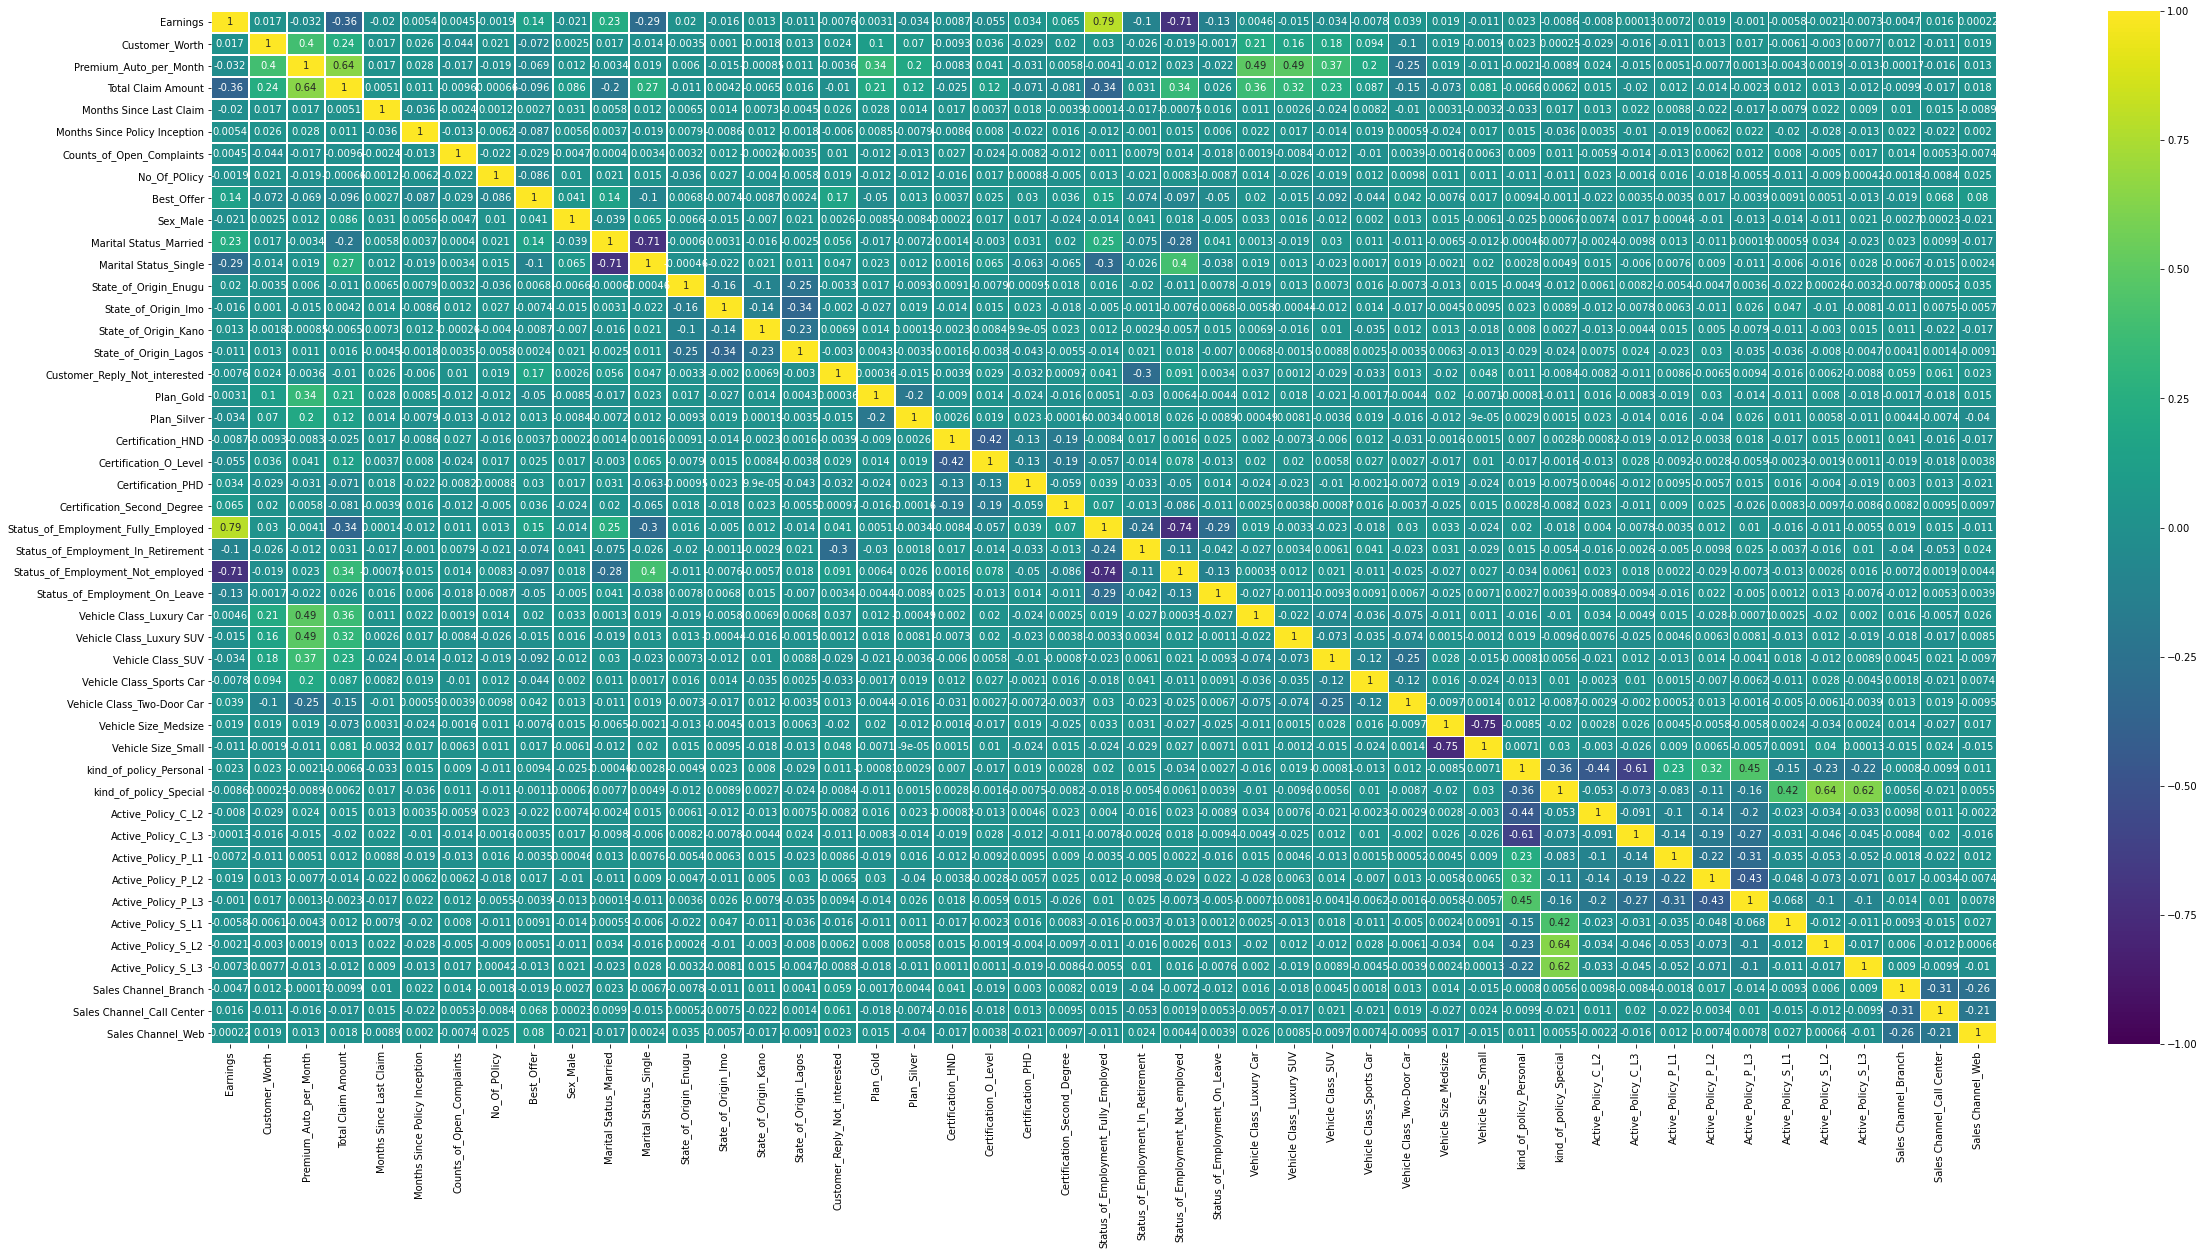

In [111]:
# # correlation heatmap after converting the categorical variables using label encoding to binary numbers

cor = trainenc.corr()
fig = plt.figure(figsize=(40,19))
ax = sns.heatmap(cor, xticklabels=cor.columns,
                 yticklabels=cor.columns, annot=True, linewidths=.2, cmap='viridis', vmin=-1, vmax=1)

### MODELLING WITHOUT REMOVING THE MULTICOLINEARITY PARAMETERS 

In [114]:
# #dropping the dependent variable from our x-train and x-test data

X_train2 = trainenc.drop(['Best_Offer','Customer_ID'], axis = 1)
y_train2 = trainenc["Best_Offer"]


X_test2 = testenc.drop(['Best_Offer','Customer_ID'], axis = 1)
y_test2 = testenc["Best_Offer"]

In [115]:
# to confirm the balancing process

print(f'The previous shape of the independent variables is {X_train2.shape}')
print(f'The previous shape of the dependent variable is {y_train2.shape}')
print('\n')

print(f'The previous shape of the independent variables is {X_test2.shape}')
print(f'The previous shape of the dependent variable is {y_test2.shape}')
print('\n')

The previous shape of the independent variables is (5114, 46)
The previous shape of the dependent variable is (5114,)


The previous shape of the independent variables is (1279, 46)
The previous shape of the dependent variable is (1279,)




In [116]:
# Standard Scaler
scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(X_train2)
test_x_scaled = scaler.transform(X_test2)

### Model Building

In this section, I would train and test several models but let's begin the simplest classifier (Logistic Regression Classifier) and test it on each of our feature selection. After this, I would try other model such as Ramdon Forest classifier, Desion tree classifier, SVG and KNN.

Before I proceed, let me do a baseline model to get an idea of what score to expect

 Baseline Model Method
 
For this, we would use the original imbalance dataset

precision = tp/(tp+fp)
recall = tp/(tp+fn)
fi_score = 2(precision)(recall)/(precision+recall)

In [117]:
# get value count of dependent variable

train['Best_Offer'].value_counts()

0    2106
1    1619
2     814
3     575
Name: Best_Offer, dtype: int64

In [118]:
# for value=> 0
base_precision =  2106 / (2106+1619+814+575)
base_recall = 2106 / 2106
base_f1 = 2 * (base_precision * base_recall) / (base_precision + base_recall)

# for value => 1
base_precision_1 = 1619 / (2106+1619+814+575)
base_recall_1 = 1619 / 1619
base_f1_1 = 2 * (base_precision_1 * base_recall_1) / (base_precision_1 + base_recall_1)

# for value => 2
base_precision_2 = 814 / (4106+1619+814+575)
base_recall_2 = 814 / 814
base_f1_2 = 2 * (base_precision_2 * base_recall_2) / (base_precision_2 + base_recall_2)

# for value => 3
base_precision_3 = 575 / (2106+1619+814+575)
base_recall_3 = 575 / 575
base_f1_3 = 2 * (base_precision_3 * base_recall_3) / (base_precision_3 + base_recall_3)

In [119]:
# print avg f1 score
print(f' Avg of f1_score of our baseline model is {(base_f1 + base_f1_1+ base_f1_2 +base_f1_3)/4}')

 Avg of f1_score of our baseline model is 0.36794675518158526


In [122]:
# Standard Scaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train2)
test_x_scaled = scaler.transform(X_test2)

### LOGISTIC REGRESSION MODEL

In [123]:
# creating an object for the algorithm

model = LogisticRegression(random_state = 5)

In [124]:
#training the model

model.fit(x_scaled, y_train2)

LogisticRegression(random_state=5)

In [125]:
#predicting using the created model.

pred = model.predict(test_x_scaled)

In [126]:
print(accuracy_score(y_test2, pred))
print(classification_report(y_test2, pred))
print(confusion_matrix(y_test2, pred))

0.5230648944487881
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       534
           1       0.49      0.56      0.52       427
           2       0.00      0.00      0.00       163
           3       0.17      0.01      0.01       155

    accuracy                           0.52      1279
   macro avg       0.30      0.34      0.30      1279
weighted avg       0.41      0.52      0.45      1279

[[431 100   1   2]
 [187 237   0   3]
 [ 97  66   0   0]
 [ 76  78   0   1]]


### MODELLING BY REMOVING THE MULTICOLINEARITY PARAMETERS

In [131]:
#dropping the columns with the multicolinearity relationship from the train and test data

X_train2 =  trainenc.drop(["Best_Offer", 'Marital Status_Single','Vehicle Size_Medsize',
                           'Status_of_Employment_Not_employed','Earnings',
                          'Total Claim Amount','Customer_ID'], axis = 1)
y_train2 = trainenc["Best_Offer"]


X_test2 =  testenc.drop(["Best_Offer",'Marital Status_Single','Vehicle Size_Medsize',
                           'Status_of_Employment_Not_employed','Earnings','Customer_ID',
                          'Total Claim Amount'], axis = 1)

y_test2 = testenc["Best_Offer"]

In [132]:
# Standard Scaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train2)
test_x_scaled = scaler.transform(X_test2)

### LOGISTIC REGRESSION MODEL

In [133]:
# creating an object for the algorithm
lr = LogisticRegression()

In [134]:
# training the model

lr.fit(x_scaled, y_train2)

LogisticRegression()

In [135]:
# predicting using the model

pred_1 = lr.predict(test_x_scaled)

In [136]:
print(accuracy_score(y_test2, pred_1))
print(classification_report(y_test2, pred_1))
print(confusion_matrix(y_test2, pred_1))

0.5207193119624707
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       534
           1       0.49      0.54      0.52       427
           2       0.50      0.01      0.01       163
           3       0.40      0.01      0.03       155

    accuracy                           0.52      1279
   macro avg       0.48      0.34      0.30      1279
weighted avg       0.50      0.52      0.45      1279

[[431 103   0   0]
 [192 232   0   3]
 [104  58   1   0]
 [ 75  77   1   2]]


### DECISION TREE MODEL

In [137]:
# Decision Trees using the model without the multicolinearity

d_tree = DecisionTreeClassifier()

d_tree.fit(x_scaled, y_train2)

Y_pred1 = d_tree.predict(test_x_scaled)

In [138]:
# scoring metrics 


print(accuracy_score(y_test2,Y_pred1))
print(classification_report(y_test2, Y_pred1))
print(confusion_matrix(y_test2, Y_pred1))

0.3971853010164191
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       534
           1       0.49      0.47      0.48       427
           2       0.10      0.14      0.12       163
           3       0.12      0.12      0.12       155

    accuracy                           0.40      1279
   macro avg       0.31      0.31      0.31      1279
weighted avg       0.42      0.40      0.41      1279

[[268 112 101  53]
 [103 199  69  56]
 [ 68  47  23  25]
 [ 59  45  33  18]]


### $\color{red}{\text{KNN MODEL}}$

In [139]:
# K - Nearest Neighboor Algorithm without the multicolinearity

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_scaled, y_train2)

Y_pred2 = knn.predict(test_x_scaled)

In [141]:
# scoring metrics 


print(accuracy_score(y_test2,Y_pred2))
print(classification_report(y_test2, Y_pred2))
print(confusion_matrix(y_test2, Y_pred2))

0.4511336982017201
              precision    recall  f1-score   support

           0       0.49      0.70      0.58       534
           1       0.46      0.42      0.44       427
           2       0.13      0.06      0.08       163
           3       0.24      0.06      0.10       155

    accuracy                           0.45      1279
   macro avg       0.33      0.31      0.30      1279
weighted avg       0.40      0.45      0.41      1279

[[376 112  34  12]
 [208 181  23  15]
 [104  45  10   4]
 [ 80  57   8  10]]


### RANDOM FOREST MODEL

In [143]:
# random forest model without the multicolinearity

rft = RandomForestClassifier()
rft.fit(x_scaled,  y_train2)

Y_pred3 = rft.predict(test_x_scaled)

In [144]:
# scoring metrics 

print(accuracy_score(y_test2,Y_pred3))
print(classification_report(y_test2, Y_pred3))
print(confusion_matrix(y_test2, Y_pred3))

0.5394839718530101
              precision    recall  f1-score   support

           0       0.55      0.84      0.66       534
           1       0.58      0.54      0.56       427
           2       0.15      0.04      0.06       163
           3       0.25      0.03      0.06       155

    accuracy                           0.54      1279
   macro avg       0.38      0.36      0.33      1279
weighted avg       0.47      0.54      0.48      1279

[[449  70  12   3]
 [175 230  15   7]
 [108  44   6   5]
 [ 89  55   6   5]]


## HYPER PARAMETER TUNNING

### RANDOM FOREST HYPER PARAMETER TUNNING AND TESTING


In [145]:
# declaring an object for the classifier
rf = RandomForestClassifier()

In [146]:
# defining Parameter Grid

param_grid = {'max_depth': [7, 15],
             'n_estimators': [500, 1000],
             'random_state': [7,10],
             'min_samples_split': [5]}

In [147]:
# define grid search
grid = GridSearchCV(rf, param_grid=param_grid,
                   cv=5, scoring='accuracy',
                   return_train_score=True)

In [148]:
grid.fit(x_scaled, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 15], 'min_samples_split': [5],
                         'n_estimators': [500, 1000], 'random_state': [7, 10]},
             return_train_score=True, scoring='accuracy')

In [151]:
grid.best_score_

0.5248300822759505

In [152]:
grid.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=1000,
                       random_state=10)

## PREDICTION USING RANDOM FOREST MODEL

In [150]:
#Make predictions using the features from the test data set
predictions = rft.predict(test_x_scaled)

#Display our predictions - they are either 0 or 1 or 2 or 3 for each training instance 
#depending on whether our algorithm believes to be the best offer for the customers
predictions


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [153]:
#Create a  DataFrame with the Customer ids and our prediction regarding whether the best offer is either 0 or 1 or 2 or 3
submission1 = pd.DataFrame({'CustomerId':test['Customer_ID'],'Best Offer':predictions})

In [155]:
#Visualize the first 5 rows
submission1.head()

,CustomerId,Best Offer
1206,Customer_8695,0
5717,Customer_1887,0
4503,Customer_1712,1
2804,Customer_5498,0
4434,Customer_4023,1


In [156]:
submission1.to_csv('Submission_vechileinsurance.csv')

## SUMMARY

* Overall, all models performed very low, but the best result came from the Random Tree classifer with an accuracy score of 0.54

* With a multicolinearity threshold of 0.70,'Total claim amount' column and 'Premium auto per amount' has high multicollinearity but for the sake of our analysis, Total Claim Amount was dropped as it display less relationship with the target variable.

* Multicollinearity did not affect the model's performance negatively when put to trial.

* During analysis, it was discovered that most of the customers selected '0' as their best offer.

* Most of the customers uses a Middle Sized vechile.

* That male and female sex has a balanced distribution

* Most of the customers are Married

* Most of the customers are from Lagos followed by Abuja

* Most of the customers are not interested in giving response.

* Majority of the customers go for bronze plan

* Majority of the customer has OND,HND and BSC Qualification.



# RECOMMENDATION

Having analyzed and developed a prediction model to determine the Best Offer for Car Insurance in respect to individual Customers, I have some recommendation:

The company should improve their web / online service for customers.
The company should improve their branding for Gold Plan.

For better analysis and to build a better model, I recommend that:

The company should provide more important parameters relevant to creating a better model for prediction.


# REFERENCES

In [ ]:
https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission
    
https://www.kaggle.com/c/dsn-prebootcamp-2021/overview